# Resampling Methods

There are two most commonly used _resampling methods,_ _cross-validation,_ and the _bootstrap_.

In [ ]:
## removing everything from memory
rm(list=ls())
## turning all warnings off
options(warn=-1)

## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

## loading the packages
library(wooldridge)

## see the raw data
head(hprice3)

## pre-processing the data set
hprice3_processed <- subset(hprice3,select=c("lprice","lland","larea","nbh","rooms","cbd","y81","ldist","baths","age","agesq"))
hprice3_processed$cbd <- log(hprice3_processed$cbd)
hprice3_processed$y81 <- as.factor(hprice3_processed$y81)
hprice3_processed$nbh <- as.factor(hprice3_processed$nbh)

head(hprice3_processed)

## Cross-Validation

These methods are used to do two things

1. _Model Assessment_ - the process of evaluating a model's performance.
2. _Model Selection_ - the process of selecting the proper level of flexibility for a model.

Since models are 'trained' using training data sets, they are by construction suitable to fit data in these training data sets only (they were fit by minimizing in-sample fitted errors). Since the validation set was not used to fit the model, these set of observations can be used to assess the performance of the model and therefore will allow us to do model selection.

In [ ]:
## installing the 'caret' package if not previously installed
if (!require(caret)) install.packages('caret')

## loading the packages
library(caret)

## continue pre-processing
## converting every categorical variable to numerical using dummy variables
dmy <- dummyVars(" ~ .", data = hprice3_processed,fullRank = T)
hprice3_processed <- data.frame(predict(dmy, newdata = hprice3_processed))

## looking at the structure of caret package.
str(hprice3_processed)

### The Validation Set Approach

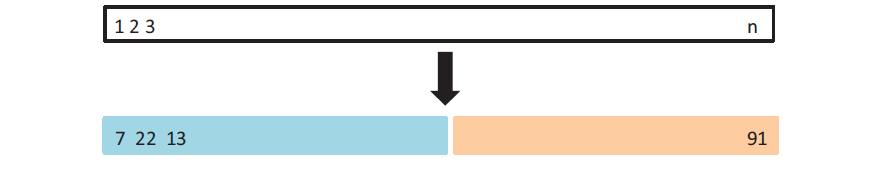

A schematic display of the validation set approach. A set of $n$ observations are randomly split into a training set (shown in blue, containing observations 7, 22, and 13, among others) and a validation set (shown in beige, and containing observation 91, among others). The statistical learning method is fit on the training set, and its performance is evaluated on the validation set.

This can be done many (say $J$) times randomly and then all model assessment measures like $RMSE$, $\bar{R}^2$, $C_p$, $BIC$, and $AIC$ can be calculated many (say $J$) times.

<ins>*Note*</ins>: Recall that if we have a sample $\{y_1,y_2,\ldots,y_m\}$ for which we have predicted $\{\widehat{y}_1,\widehat{y}_2,\ldots,\widehat{y}_m\}$, then the $MSE$ for these samples is defined as
    
 \begin{align*}
 MSE = \frac{1}{m}\sum_{j=1}^m (y_j-\widehat{y}_j)^2\text{,}
 \end{align*}
 
 and the $RMSE$ is simply defined as $RMSE=\sqrt{MSE}$.
    

In [ ]:
## spliting processed data set into two parts based on outcome: 80% and 20%
index <- createDataPartition(hprice3_processed$lprice, p=0.80, list=FALSE)
trainSet <- hprice3_processed[ index,]
validationSet <- hprice3_processed[-index,]

## checking the structure of trainSet
str(trainSet)

## checking the structure of validationSet
str(validationSet)

**__Example__**: Linear Regression

In [ ]:
## train a linear regression model
model <- lm(lprice~., data=trainSet)
summary(model)

## making predictions
predictions <- predict(model, validationSet)

## summarize results
postResample(pred = predictions, obs = validationSet$lprice)

### Leave-One-Out Cross-Validation

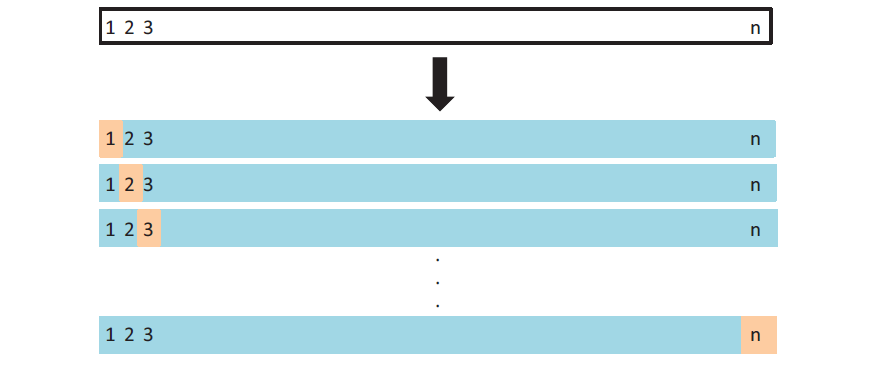

A schematic display of **LOOCV**. A set of $n$ data points is repeatedly split into a training set (shown in blue) containing all but one observation, and a validation set that contains only that observation (shown in beige). The test error is then estimated by averaging the $n$ resulting $MSE$’s. The first training set contains all but observation 1, the second training set contains all but observation 2, and so forth.

Notice that a total of $n$ training data sets containing exactly $n-1$ observations have been constructed along with $n$ corresponding validation data sets containing exactly $1$ observation each.

<ins>*Note*</ins>: Recall that in this case we will be using the training data set $\{(y_1,\mathbf{x}_1^\prime),\ldots,(y_{i-1},\mathbf{x}_{i-1}^\prime),(y_{i+1},\mathbf{x}_{i+1}^\prime),\ldots,(y_n,\mathbf{x}_n^\prime)\}$ to predict $y_i$ for $i=1,\ldots,n$. Therefore the $MSE$ is defined as before for pairs $\{(y_1,\widehat{y}_1),\ldots,(y_n,\widehat{y}_n)\}$, i.e., $MSE_i=(y_1-\widehat{y}_1)^2$, $MSE=n^{-1}\sum_{i=1}^{n}MSE_i$, and $RMSE=\sqrt{MSE}$.

**__Example__**: Linear Regression

In [ ]:
# define training control
train_control <- trainControl(method="LOOCV")

# train the model
model <- train(lprice~., data=hprice3_processed, trControl=train_control, method="glm")

# summarize results
print(model)

### $k$-Fold Cross-Validation

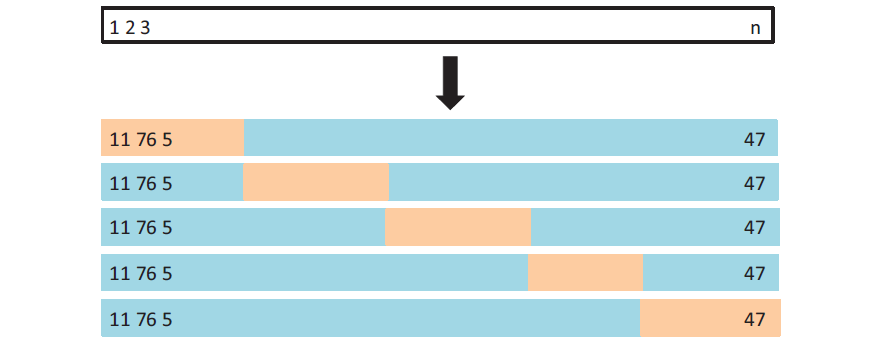

A schematic display of 5-fold CV. A set of $n$ observations is randomly split into five non-overlapping groups. Each of these fifths acts as a validation set (shown in beige), and the remainder as a training set (shown in blue). The test error is estimated by averaging the five resulting $MSE$ estimates.

Notice that this approach involves randomly dividing the set of observations into $k$ groups (called __folds__), of approximately equal size. The first fold is treated as a validaton set, and the method is fit on the remaining $k−1$ folds.

<ins>*Note*</ins>: For each fold $k$, notice that we can calculate the corresponding $MSE$ using the validation set for that fold. Therefore, we will have $MSE_1,\ldots,MSE_k$ so $MSE=k^{-1}\sum_{j=1}^{k}MSE_j$, and $RMSE=\sqrt{MSE}$.

**__Example__**: Linear Regression

In [ ]:
# define training control
train_control <- trainControl(method="cv", number=10)

# set the seed for reproducibility
set.seed(42)

# train the model
model <- train(lprice~., data=hprice3_processed, trControl=train_control, method="glm")

# summarize results
print(model)